In [1]:
import cv2
import pytesseract
import numpy as np
import os
import matplotlib.pyplot as plt

def process_image(image_path):
    # Read the image
    original_image = cv2.imread(image_path)
    
# Example usage:
image_path = r'C:\Users\manas\OneDrive\Documents\GitHub\amazonml\__pycache__\sample_images\51Mh3RMYrcL.jpg'
print(image_path)

C:\Users\manas\OneDrive\Documents\GitHub\amazonml\__pycache__\sample_images\51Mh3RMYrcL.jpg


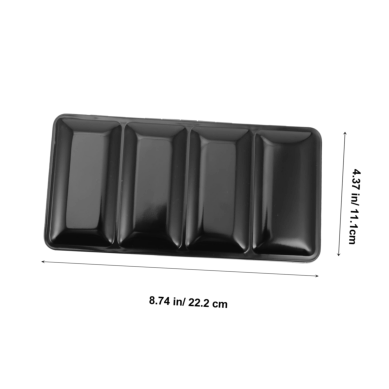

In [2]:
    # Convert to grayscale
original_image = cv2.imread(image_path)
if original_image is not None:
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
        plt.imshow(gray_image, cmap='gray')
        plt.axis('off')
        plt.show()
else:
        print(f"Error: Unable to load image at {image_path}")


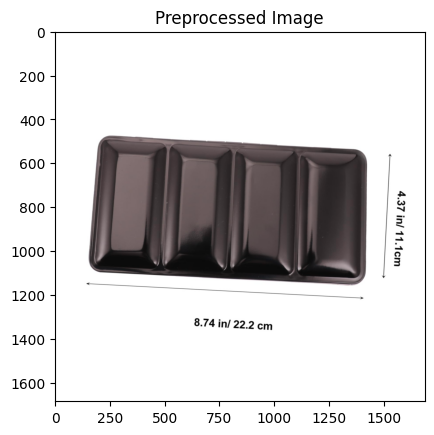

Text from image:
4.37 in/ 11.1cm

8.74 in/ 22.2 cm




In [3]:

    # Display the preprocessed image and OCR result
    # OCR Processing
text = pytesseract.image_to_string(original_image)
plt.imshow(original_image, cmap='gray')
plt.title("Preprocessed Image")
plt.show()
print(f"Text from image:\n{text}\n")

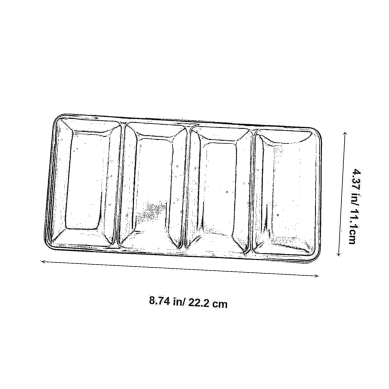

In [4]:
# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

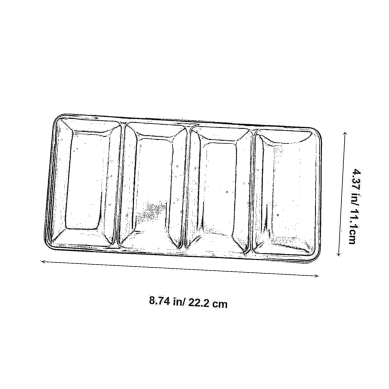

In [5]:
# Noise removal using Median Blur
denoised_image = cv2.medianBlur(binary_image, 3)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

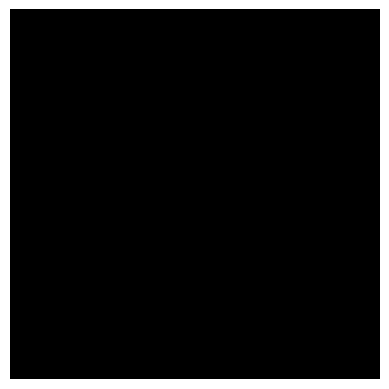

In [6]:
    # Dilation
kernel = np.ones((1,1), np.uint8)
dilated_image = cv2.dilate(denoised_image, kernel, iterations=1)
plt.imshow(kernel, cmap='gray')
plt.axis('off')
plt.show()

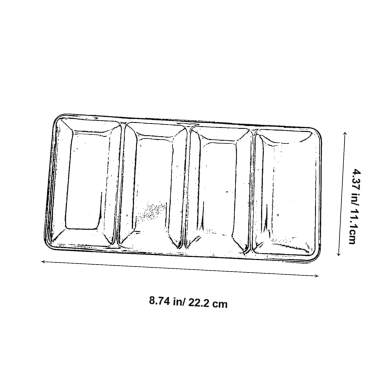

In [7]:
    # Erosion
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')
plt.show()

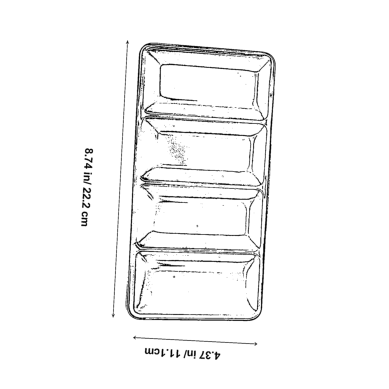

In [8]:
    # Skew Correction (rotation)
def correct_skew(image):
        coords = np.column_stack(np.where(image > 0))
        angle = cv2.minAreaRect(coords)[-1]
        if angle < -45:
            angle = -(90 + angle)
        else:
            angle = -angle
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
        return rotated
    
skew_corrected_image = correct_skew(eroded_image)
plt.imshow(skew_corrected_image, cmap='gray')
plt.axis('off')
plt.show()    


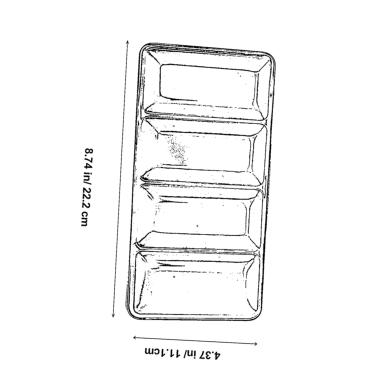

In [9]:
    # Resize image (increase size for better OCR performance)
resized_image = cv2.resize(skew_corrected_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(resized_image, cmap='gray')
plt.axis('off')
plt.show()      


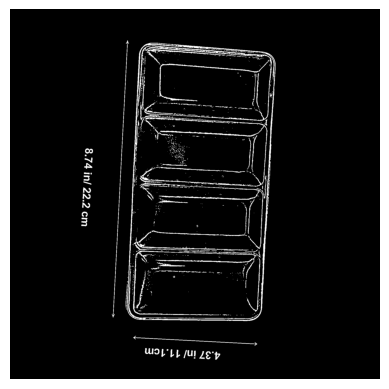

In [10]:
    # Invert colors for white text on black background (optional, based on image content)
inverted_image = cv2.bitwise_not(resized_image)
plt.imshow(inverted_image, cmap='gray')
plt.axis('off')
plt.show()  


In [11]:
    # OCR Processing
text = pytesseract.image_to_string(inverted_image)
   


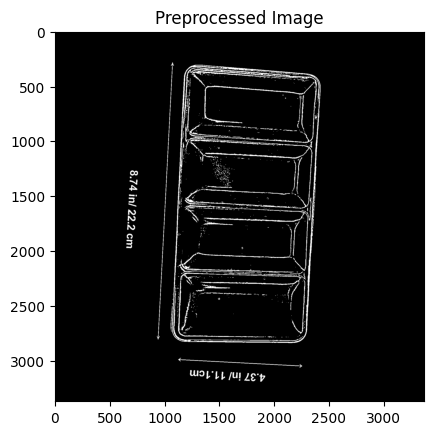

Text from image:
8.74 in/ 22.2 cm

WILLE (Ul 2e"p




In [12]:
    # Display the preprocessed image and OCR result
plt.imshow(inverted_image, cmap='gray')
plt.title("Preprocessed Image")
plt.show()
print(f"Text from image:\n{text}\n")

In [13]:
# Example usage:
process_image(image_path)

In [14]:
import re
import string

def preprocess_ocr_text(ocr_results):
  
    
    # Remove unwanted characters (e.g. punctuation, special characters)
    ocr_results = re.sub(r'[^a-zA-Z0-9\s]', '', ocr_results)

    # Convert to lowercase
    # ocr_results = ocr_results.lower()

    # Remove extra whitespace
    ocr_results = re.sub(r'\s+', ' ', ocr_results)

    # Remove leading and trailing whitespace
    ocr_results = ocr_results.strip()

    return ocr_results

In [15]:
ocr_results = [text]  # Assuming 'text' contains the OCR result from the previous cell

prep_text = []
for text in ocr_results:
    preprocessed_text = preprocess_ocr_text(text)
    prep_text.append(preprocessed_text)


In [16]:
print(prep_text)

['874 in 222 cm WILLE Ul 2ep']


In [17]:
for text in ocr_results:
    print(f"{text}")

8.74 in/ 22.2 cm

WILLE (Ul 2e"p



In [21]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

pattern = [{"TEXT": {"REGEX": r"\d+(\.\d+)?[a-z]+(/\d+(\.\d+)?[a-z]+)?"}}]
matcher.add("QUANTITY_PATTERN", [pattern])

for text in ocr_results:
    doc = nlp(text)
    matches = matcher(doc)
    for match_id, start, end in matches:
        entity = doc[start:end]
        print(f"Entity: {start}, {entity.text}, Label: QUANTITY")

Entity: 0, 8.74in/22.2, Label: QUANTITY


In [75]:
i=0;
for text in ocr_results:
    doc = nlp(text)
    for entity in doc.ents:
        if (entity.label_=="QUANTITY"):
            print(f" Entity: {entity.start},{entity.text}, Label: {entity.label_}")

 Entity: 0,8.74in/22.2cm, Label: QUANTITY


CSV file 'ocr_entities.csv' has been created.


In [79]:
import pandas as pd


df = pd.read_csv('ocr_entities.csv')

In [80]:
df.head()

,id,Entity,Label
0,0,8.74in/22.2cm,QUANTITY
